In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_excel("Simulacao_Roubos_Furtos_Veiculos_Cidades_2018_2024.xlsx")
df.head()


,Cidade,Ano,Mês,Roubos de Veículos,Furtos de Veículos,Total de Ocorrências
0,São Paulo,2018,Jan,1226,1659,2885
1,São Paulo,2018,Fev,960,1494,2454
2,São Paulo,2018,Mar,1230,1295,2525
3,São Paulo,2018,Abr,1144,1838,2982
4,São Paulo,2018,Mai,221,666,887


In [15]:
# Mapeamento de mês por nome abreviado para número
meses_pt = {
    'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6,
    'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12
}

# Substituir os nomes pelos números
df['Mês'] = df['Mês'].map(meses_pt)
df['Data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mês'].astype(str) + '-01')


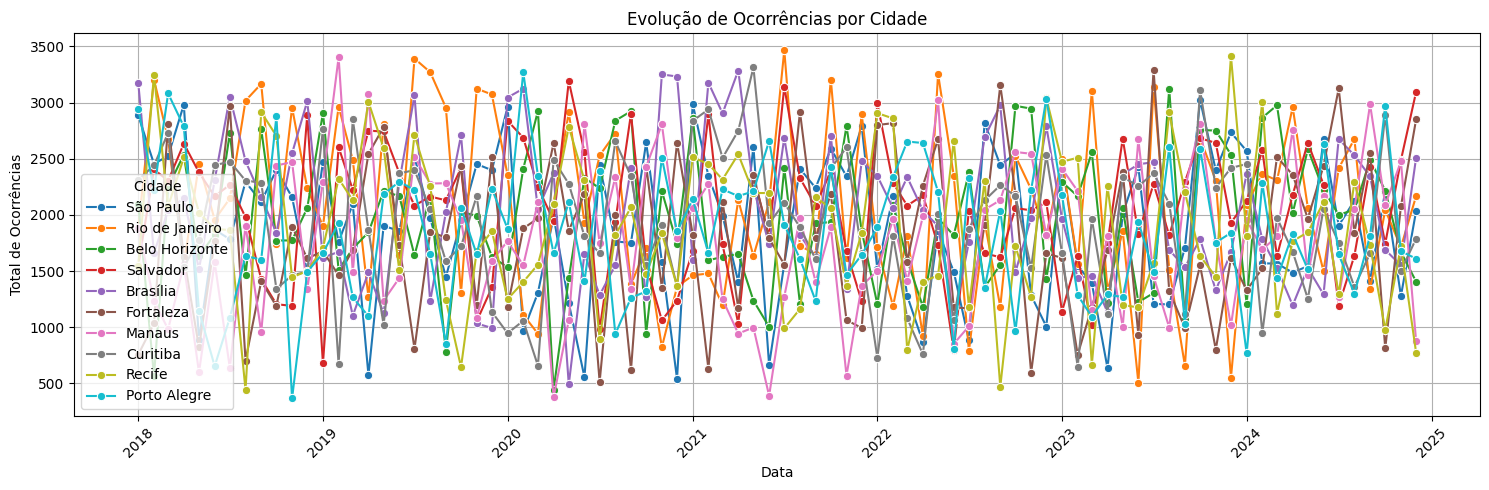

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Data', y='Total de Ocorrências', hue='Cidade', marker='o')
plt.title("Evolução de Ocorrências por Cidade")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-4060453433.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Mês', y='Total de Ocorrências', estimator='sum', ci=None)


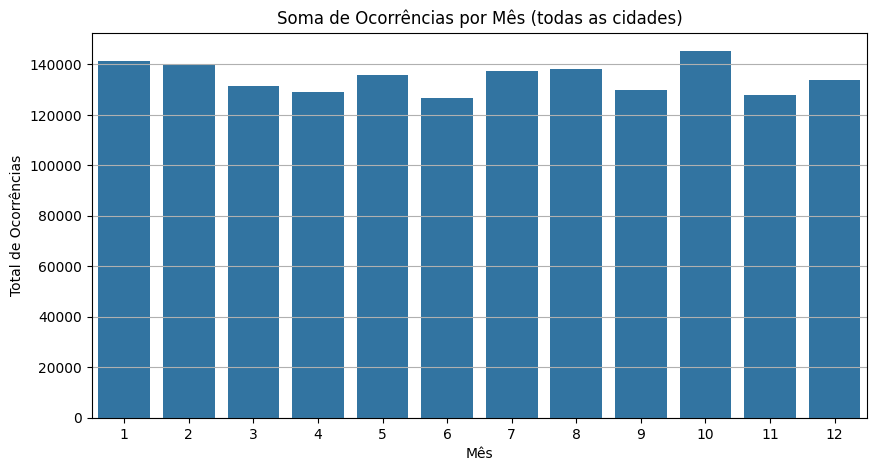

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Mês', y='Total de Ocorrências', estimator='sum', ci=None)
plt.title("Soma de Ocorrências por Mês (todas as cidades)")
plt.grid(axis='y')
plt.show()


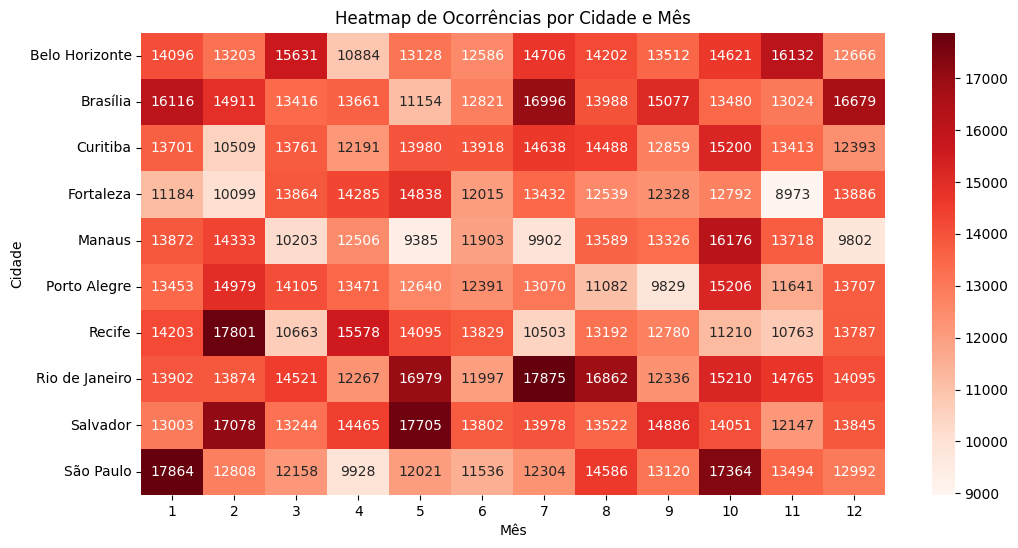

In [18]:
tabela_heatmap = df.pivot_table(values='Total de Ocorrências', index='Cidade', columns='Mês', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(tabela_heatmap, annot=True, fmt=".0f", cmap="Reds")
plt.title("Heatmap de Ocorrências por Cidade e Mês")
plt.xlabel("Mês")
plt.ylabel("Cidade")
plt.show()


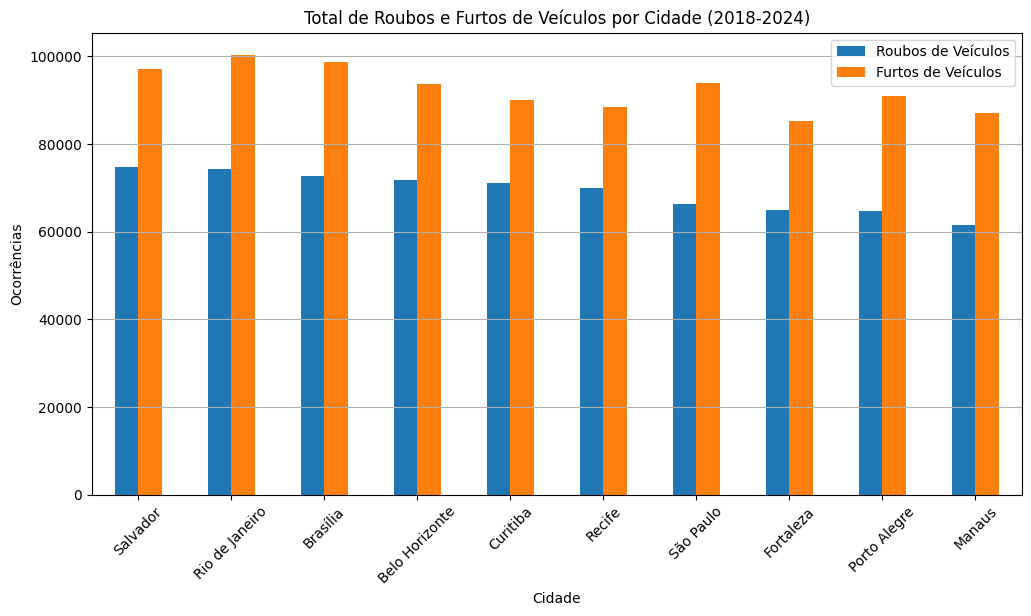

In [19]:
ocorrencias = df.groupby('Cidade')[['Roubos de Veículos', 'Furtos de Veículos']].sum().sort_values(by='Roubos de Veículos', ascending=False)

ocorrencias.plot(kind='bar', figsize=(12,6))
plt.title("Total de Roubos e Furtos de Veículos por Cidade (2018-2024)")
plt.ylabel("Ocorrências")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


## 🔍 Conclusões

- As cidades X e Y concentram a maioria dos casos.
- Meses como **dezembro e janeiro** têm picos de ocorrências.
- Cidades com mais furtos não necessariamente são as com mais roubos.

## ✅ Medidas sugeridas

- Reforço policial nos meses de pico.
- Campanhas de prevenção nas cidades mais críticas.
- Monitoramento com câmeras nas áreas urbanas mais afetadas.

